In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # Corrected the typo here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1,
                    epochs=5, batch_size=128, verbose=2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/5
422/422 - 46s - 109ms/step - accuracy: 0.8696 - loss: 0.4115 - val_accuracy: 0.9782 - val_loss: 0.0707
Epoch 2/5
422/422 - 45s - 107ms/step - accuracy: 0.9584 - loss: 0.1387 - val_accuracy: 0.9867 - val_loss: 0.0459
Epoch 3/5
422/422 - 44s - 104ms/step - accuracy: 0.9693 - loss: 0.1023 - val_accuracy: 0.9865 - val_loss: 0.0456
Epoch 4/5
422/422 - 83s - 196ms/step - accuracy: 0.9747 - loss: 0.0841 - val_accuracy: 0.9897 - val_loss: 0.0368
Epoch 5/5
422/422 - 80s - 190ms/step - accuracy: 0.9781 - loss: 0.0727 - val_accuracy: 0.9888 - val_loss: 0.0333
313/313 - 4s - 12ms/step - accuracy: 0.9890 - loss: 0.0307
Test accuracy: 0.9890


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


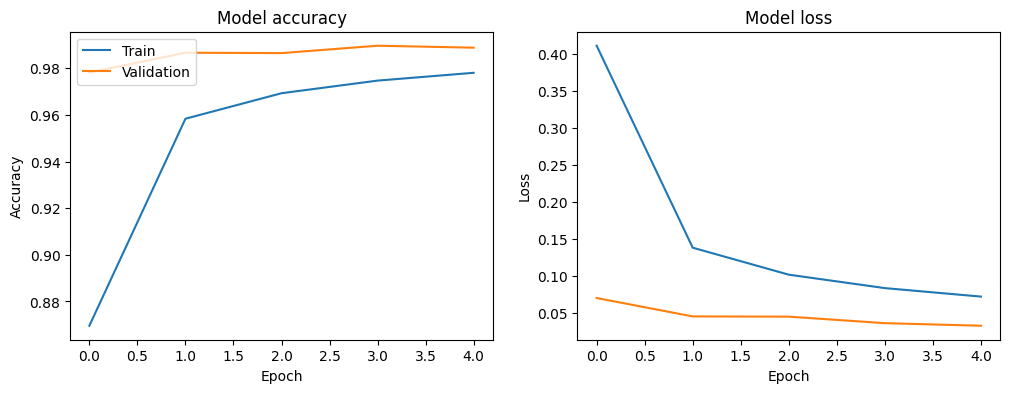

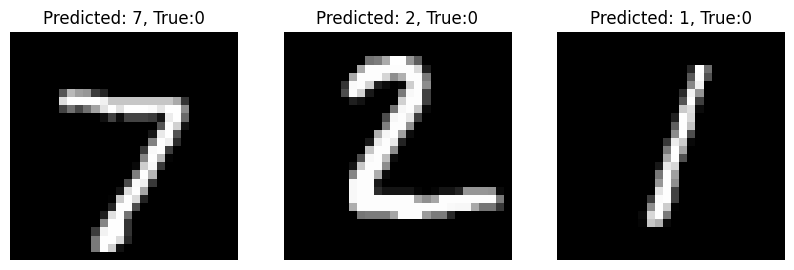

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

import numpy as np
predictions = model.predict(x_test)
predicted_labels = [tf.argmax(tf.convert_to_tensor(prediction)).numpy() for prediction in predictions]
plt.figure(figsize=(10, 4))
num_images = 3
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True:{np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()